In [1]:
from sklearn.datasets import load_iris
import pandas as pd
# Load iris dataset
iris=load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#display dataframe
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
flower_feature = iris.data
#display(flower_feature)

In [3]:
from sklearn.cluster import KMeans
num_clusters =3
kmeans_iris = KMeans(n_clusters=num_clusters)
kmeans_iris.fit(flower_feature[:,2:4])

C:\Users\Sabarinath\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sabarinath\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [4]:
# Getting cluster labels  and cluster centres
cluster_labels_iris = kmeans_iris.labels_
cluster_centers_iris = kmeans_iris.cluster_centers_
print(cluster_labels_iris)
print(iris.target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


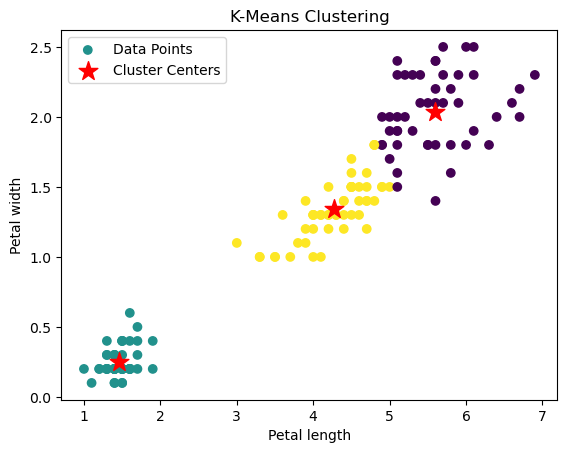

In [5]:
# Visualizing the clusters and cluster centres
import matplotlib.pyplot as plt
plt.scatter(flower_feature[:,2], flower_feature[:,3], c=cluster_labels_iris, cmap='viridis', label = 'Data Points')
plt.scatter(cluster_centers_iris[:,0], cluster_centers_iris[:,1], marker='*', s=200, c='red', label='Cluster Centers')
plt.title("K-Means Clustering")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

C:\Users\Sabarinath\AppData\Local\Temp\ipykernel_22968\2050054454.py:13: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(new_data[:, 0], new_data[:, 1], c=predicted_clusters, cmap='coolwarm', marker='x', s=200, label='New Data', edgecolors='black')


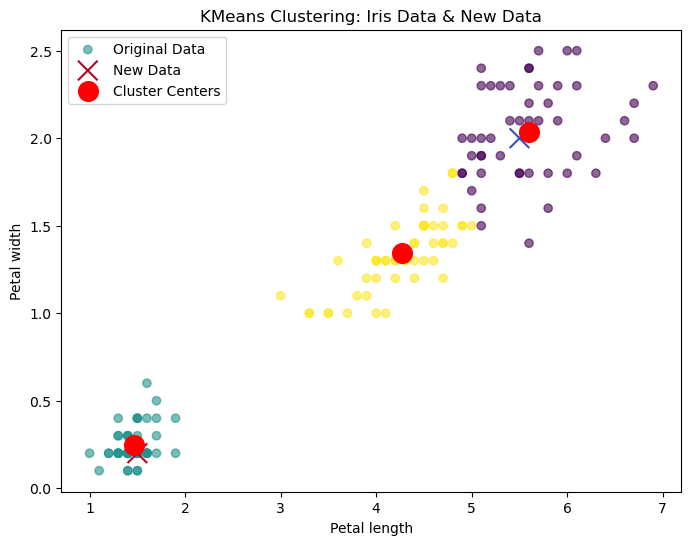

Predicted clusters for new data: [1 0]


In [6]:
import numpy as np
new_data = np.array([[1.5, 0.2],  # Example of new data point
                     [5.5, 2.0]])  # Another new data point
predicted_clusters = kmeans_iris.predict(new_data)

# Visualize the original data with the predicted clusters
plt.figure(figsize=(8, 6))

# Scatter plot of the original Iris data
plt.scatter(flower_feature[:, 2], flower_feature[:, 3], c=cluster_labels_iris, cmap='viridis', label='Original Data', alpha=0.6)

# Scatter plot of new data points
plt.scatter(new_data[:, 0], new_data[:, 1], c=predicted_clusters, cmap='coolwarm', marker='x', s=200, label='New Data', edgecolors='black')

# Plot the cluster centers
plt.scatter(kmeans_iris.cluster_centers_[:, 0], kmeans_iris.cluster_centers_[:, 1], c='red', marker='o', s=200, label='Cluster Centers')

# Add labels and title
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('KMeans Clustering: Iris Data & New Data')
plt.legend()

# Show the plot
plt.show()

# Print the predicted cluster labels for the new data points
print(f"Predicted clusters for new data: {predicted_clusters}")

In [7]:
from sklearn.metrics import silhouette_score
score = silhouette_score(flower_feature[:,2:4], cluster_labels_iris)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6604800083974887
